# Maxiumum Channel Capacity

Exercise 9.8 from Mackay's book, pg 150

Jim Mahoney | Feb 2014

In [1]:
from numpy import *
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def h(p):
    """ information entropy for one probability """
    return p * log2(1/p)
def H(ps):
    """ information entropy of a probability distribution """
    # which should sum to 1
    ps = filter( lambda x: x != 0, ps)
    return sum(list(map(h, ps)))

# This is the Z channel, error probabilities f = P(y=0|x=1), 0 = P(y=1|x=0)
def Pxy(a, f):
    return [a, 0, f*(1-a), (1-f)*(1-a)]
def Px(a, f):
    return [a, 1-a]
def Py(a, f):
    return [f*(1-a) + a, (1-f)*(1-a)]


In [14]:
H([.5,.5])

1.0

An example: f = 0.15, a = 0.5

In [15]:
f = 0.15
a = 0.5
print(Px(a,f))
print(Py(a,f))
print(Pxy(a,f))

[0.5, 0.5]
[0.575, 0.425]
[0.5, 0, 0.075, 0.425]


In [17]:
print("Hx = ", H(Px(a,f)))
print("Hy = ", H(Py(a,f)))
print("Hxy = ", H(Pxy(a,f)))
print("I(x;y) = ", H(Py(a,f)) + H(Px(a,f)) - H(Pxy(a,f)))

Hx =  1.0
Hy =  0.9837082626231859
Hxy =  1.3049201523582004
I(x;y) =  0.6787881102649855


What is the maximum channel capacity when f = 0.15?

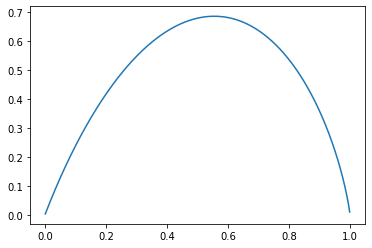

In [19]:
# Look at many possible values for a.
f = 0.15
da = 0.001
a = arange(da, 1, da)
def I(a,f):
    """ mutual information = channel capacity """
    return list(map( lambda aa: H(Py(aa,f)) + H(Px(aa,f)) - H(Pxy(aa,f)), a))
I15 = I(a, 0.15)
plot(a, I15)

In [9]:
I15.index(max(I15))

554

In [10]:
best_a = da * 554

In [11]:
I([best_a], 0.15)

[0.68541512363104662]